In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from hotstep.Basis import Basis
from hotstep.Step import Step
from hotstep.Steps import Steps
from hotstep.Steps import Analysis


### Step and Steps math

In [2]:
tbase = Basis(Basis.sigmoid,5)

s0 = Step(5,4)
s1 = Step(3.75,None,3)
s2 = Step(5.6,6,2)
s3 = Step(8.2,8.8)
s4 = Step(9.2,9.8)
s5 = Step(7.2)
s6 = Step(12,1.5)
s7n = Step(9,weight=-1)
s8n = Step(9.5,weight=-1)


sts1 = s1 + s2 + s3 #+ s0
sts2 = sts1 + s4 - s5
sts3 = s5 + s4 + s7n + s8n - s1
sts4 = sts2 + (s5 >> 2)
sts5 = sts4 - s2
sts5 += (s6 >> 2)
sts6 = sts2 - s3 - sts1 + s4 + sts3 + sts3


In [ ]:
type(s0*s0)

### Plotting both Step and Steps using MPL directly

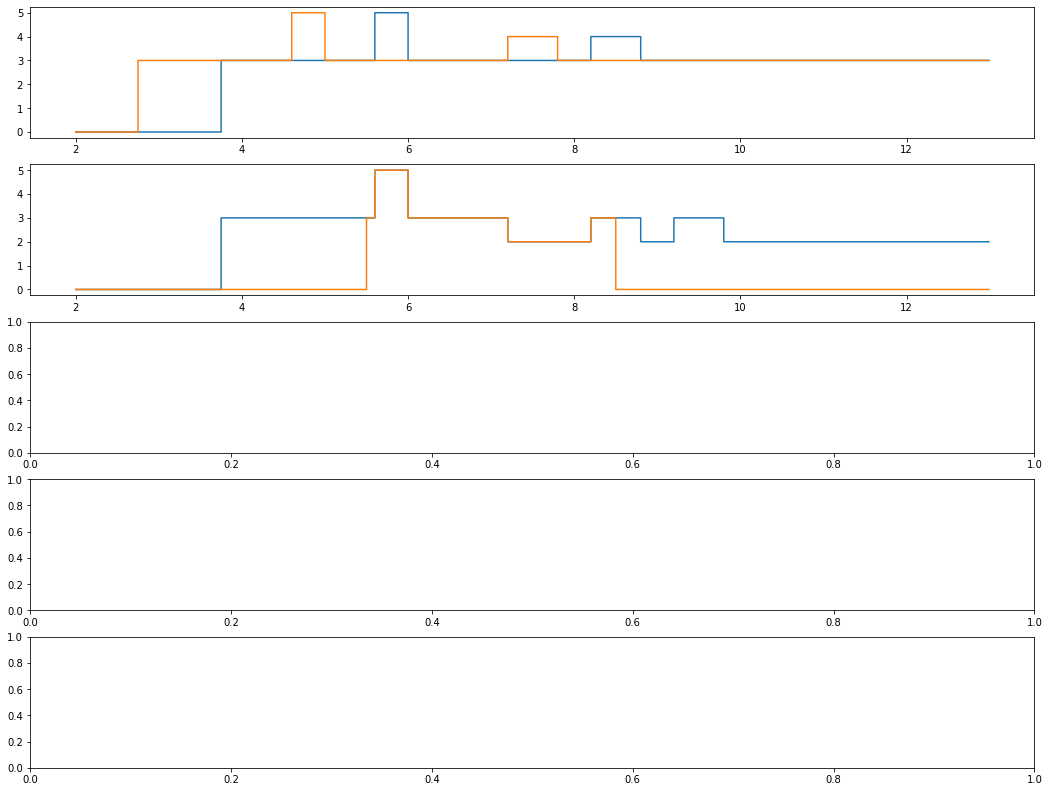

In [3]:
p = np.arange(2,13,0.01)
fig,ax = plt.subplots(nrows=5,figsize=(18,14))

ax[0].step(p,sts1[p])
#ax[0].step(p,(sts1>>2)[p])
ax[0].step(p,(sts1<<1)[p])
ax[1].step(p,sts2[p])
sts2_clip = sts2.clip(5.5,8.5)

ax[1].step(p,sts2_clip[p])
# ax[2].step(p,sts3[p])
# ax[3].step(p,sts4.step(p))
# ax[4].step(p,sts5[p])
# ax[4].step(p,sts6.step(p))



In [ ]:
p = np.arange(2,13,0.01)
fig,ax = plt.subplots(nrows=3,figsize=(12,14))

ax[0].step(p,(s2 >> 3).smooth_step(p,smooth_factor=0.0001))
ax[0].step(p,s2[p])
ax[0].step(p,((s2+2).reflect() << 2).step(p))
ax[0].step(p,((s2+2).reflect() << 1).smooth_step(p,smooth_factor=0.0001))
ax[1].step(p,s3.step(p))
ax[1].step(p,s4[p])
ax[1].step(p,s8n[p])
ax[2].step(p,s4[p])
ax[2].step(p,s2[p])
ax[2].step(p,(s4-s2)[p])
#ax[2].step(p,(s4 <<0.25)[p])
#ax[2].step(p,((s4*2)*(s4*3 << 0.25))[p])
#ax[2].step(p,(s4*(s4 << 0.5))[p])

(s4*s4)==s4**2

In [ ]:
p = np.arange(2,13,0.01)
fig,ax = plt.subplots(nrows=3,figsize=(12,14))

stsss = s2 - s2>>2 + s4 + s2-s2+s4+s2+s2+s1-s1
stsss.reduce()
stsss.plot(ax=ax[0])
nps = stsss._steps
nps

### Plotting Steps using internal plot

<AxesSubplot:>

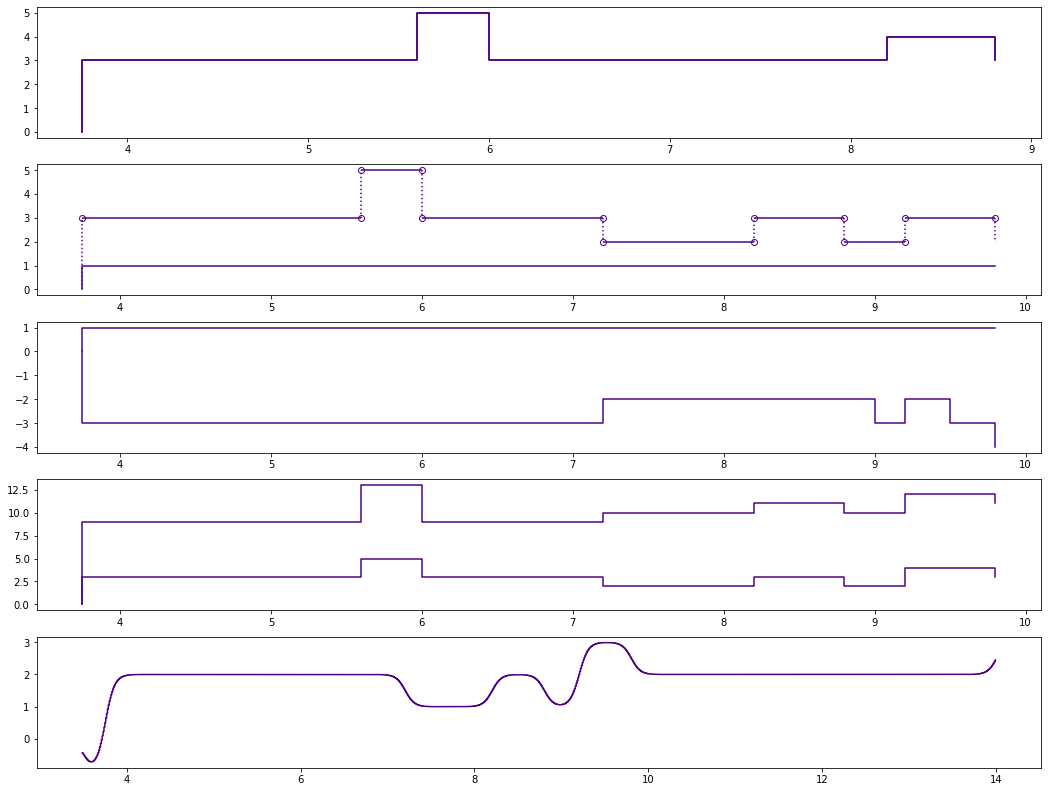

In [7]:
fig,ax = plt.subplots(nrows=5,figsize=(18,14))

sts1.plot(ax=ax[0])
(sts1!=0).plot(ax=ax[0])
sts2.plot(ax=ax[1],method='pretty')
(sts2**2).normalise().plot(ax=ax[1])
sts3.plot(ax=ax[2])
(sts3**2).normalise().plot(ax=ax[2])
sts4.plot(ax=ax[3])
(sts4**2).plot(ax=ax[3])
#(sts4!=0).normalise().plot(ax=ax[3])
sts5.plot(ax=ax[4],method='smooth',smooth_factor=0.0001)


In [ ]:
p = np.arange(2,13,0.01)
fig,ax = plt.subplots(nrows=5,figsize=(18,14))

sts1.plot(ax=ax[0])
#ax[0].step(p,(sts1 > 0).step(p))
(sts1>3).plot(ax=ax[0])

sts2.plot(ax=ax[1])
(sts2 > 0).normalise().plot(ax=ax[1])
#sts2.invert().plot(ax=ax[1])
sts3.reflect().plot(ax=ax[2])
sts3.plot(ax=ax[2])
sts3.normalise().plot(ax=ax[2])
#(sts3.reflect() >0).normalise().plot(ax=ax[2])
#sts3.plot(ax=ax[2])

sts4.plot(ax=ax[3])
(sts4>1).plot(ax=ax[3])
sts5.plot(ax=ax[4])
sts5.plot(ax=ax[4],method='smooth',smooth_factor=0.0001)


#mask = np.where(sts4._cumsum > 0, 1,0)
#mask


In [ ]:
p = np.arange(2,13,0.01)
fig,ax = plt.subplots(nrows=3,figsize=(8,6))

ax[0].step(p,s1[p])
s1a = s1 >> 2
ax[1].step(p,s1a[p])
s1b = s1a << 2
ax[2].step(p,s1b[p])

s1 in [s1b,s2,s3]

In [ ]:
sts2_dict = sts2.to_dict()
try:
    k = sts2_dict[5.5]
except KeyError:
    print(f'not key {5.5}')